In [1]:
import numpy as np
import pandas as pd
import scipy
import torch
import matplotlib.pyplot as plt

import matplotlib.animation as animation

# Full Batch Gradient descent with momnetum

## Example - 1

In [2]:
num_samples = 40
np.random.seed(45) 

# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


### Number of epochs required

In [3]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)       #reshape is same as view
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_true=torch.linalg.inv(x.T@x)@(x.T@y)
print(f"theta_true: \n {theta_true}")
print("\n")

theta_hist=[]
loss_hist=[]
learning_rate=0.001
Epoch=0
v_t = torch.zeros_like(theta)
beta = 0.08

while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()       # As soon as you alled the backward func in the loss it calculates the grad  of loss wrt defined var which has req_grad=True and stores in the defined var.grad
    with torch.no_grad():
        v_t = beta*v_t + (1-beta)*theta.grad
        theta-=learning_rate*v_t
        theta.grad.zero_()
        
    if(torch.norm(theta-theta_true)<0.001):
        break
    
    if(Epoch>=10000):
        break

print(f"Average number of steps required to satisfy this convergence criterion (Full Batch GD): {Epoch}") 

print("\n")
print("Final theta: \n ", theta.detach())

theta_true: 
 tensor([[ 0.9506],
        [99.9841]])


Average number of steps required to satisfy this convergence criterion (Full Batch GD): 3882


Final theta: 
  tensor([[ 0.9496],
        [99.9841]])


### Visualizing True data and Predicted data after FBGD

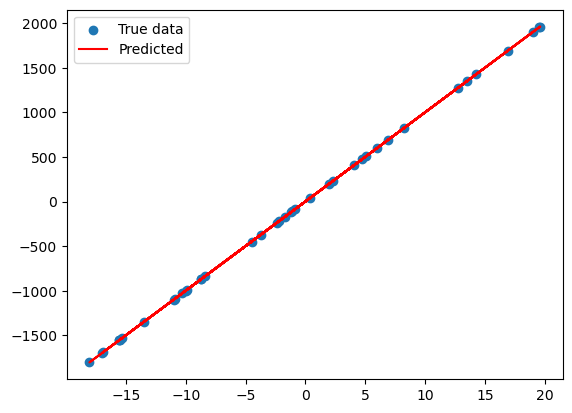

In [6]:
y_pred = x @ theta
plt.scatter(x[:,1].detach().numpy().reshape(-1, 1), y.detach().numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].detach().numpy().reshape(-1, 1), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

### FBGD Convergence graphs over 15 epochs

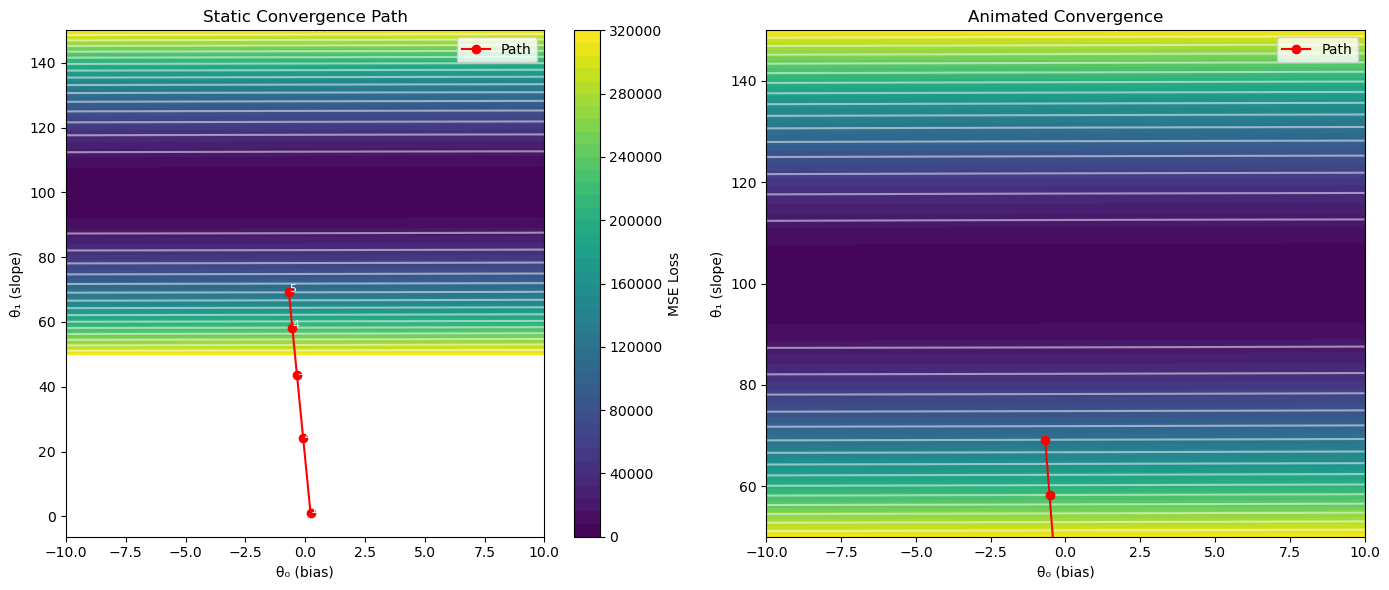

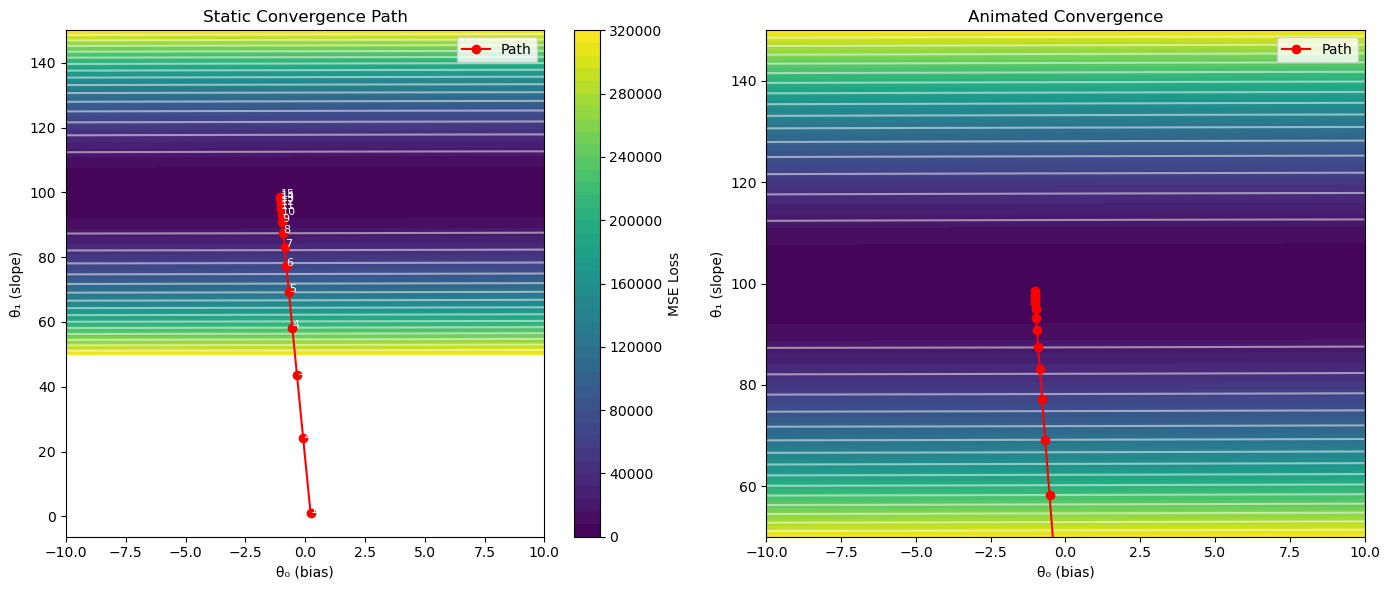

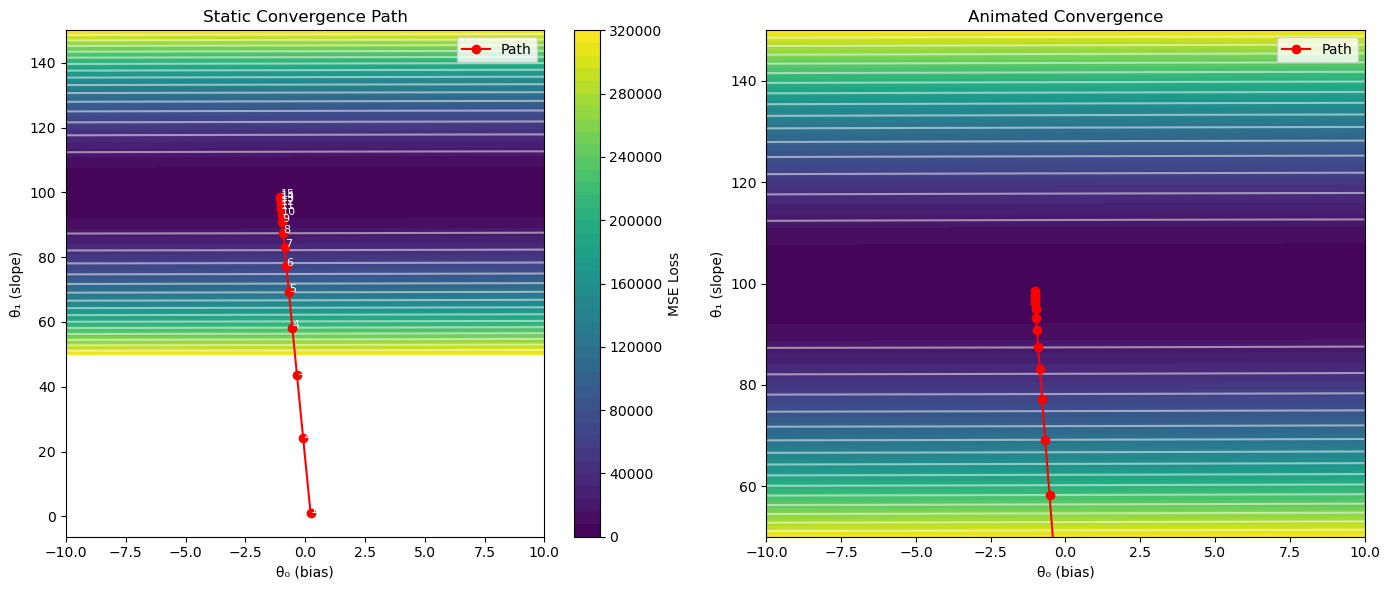

In [7]:
def visualize_convergence(x, y, theta_hist):
    """
    Show static + animated gradient descent convergence side by side.
    """
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    # ✅ Create a single figure with 2 subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Static Plot on Left ---
    c1 = ax1.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax1.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    ax1.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
    for i, (t0, t1) in enumerate(theta_hist):
        ax1.text(t0, t1, str(i+1), color="white", fontsize=8)
    fig.colorbar(c1, ax=ax1, label="MSE Loss")
    ax1.set_xlabel("θ₀ (bias)")
    ax1.set_ylabel("θ₁ (slope)")
    ax1.set_title("Static Convergence Path")
    ax1.legend()

    # --- Animated Plot on Right ---
    c2 = ax2.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax2.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    line, = ax2.plot([], [], 'ro-', label="Path")
    ax2.set_xlabel("θ₀ (bias)")
    ax2.set_ylabel("θ₁ (slope)")
    ax2.set_title("Animated Convergence")
    ax2.legend()

    def update(frame):
        line.set_data(theta_hist[:frame+1, 0], theta_hist[:frame+1, 1])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)

    plt.tight_layout()

    return ani

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist[:5])
ani.save("Example1 - FBGD (with p) Convergence after 5 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist[:15])
ani.save("Example1 - FBGD (with p) Convergence after 15 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist[:500])
ani.save("Example1 - FBGD (with p) Convergence after 500 epochs.gif", writer="pillow", fps=2)

### Loss vs epochs graph

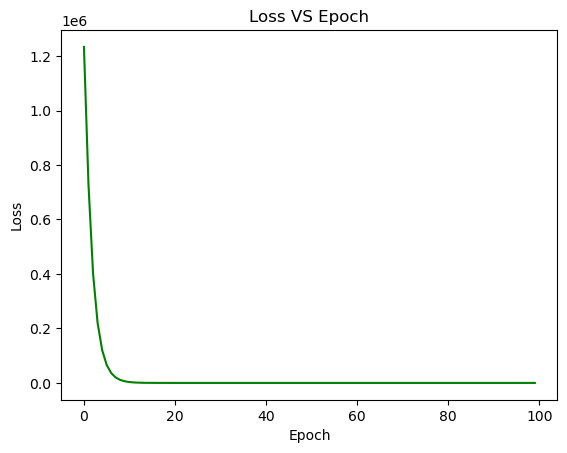

In [8]:
Epoch_hist=np.array([i for i in range(100)])
plt.plot(Epoch_hist,loss_hist[:100],color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

## Example - 2

In [10]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

### Number of epochs required

In [11]:
theta=torch.randn((2,1),requires_grad=True)

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_true=torch.linalg.inv(x.T@x)@(x.T@y)
print(f"theta_true: \n {theta_true}")
print("\n")

theta_hist=[]
loss_hist=[]
learning_rate=0.001
Epoch=0
v_t = torch.zeros_like(theta)
beta = 0.08

while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()       # As soon as you alled the backward func in the loss it calculates the grad  of loss wrt defined var which has req_grad=True and stores in the defined var.grad
    with torch.no_grad():
        v_t = beta*v_t + (1-beta)*theta.grad
        theta-=learning_rate*v_t
        theta.grad.zero_()
        
    if(torch.norm(theta-theta_true)<0.001):
        break
    
    if(Epoch>=10000):
        break

print(f"Average number of steps required to satisfy this convergence criterion (Full Batch GD): {Epoch}") 

print("\n")
print("Final theta: \n ", theta.detach())

theta_true: 
 tensor([[3.9507],
        [2.6825]])


Average number of steps required to satisfy this convergence criterion (Full Batch GD): 10000


Final theta: 
  tensor([[3.9497],
        [2.6740]])


### Visualizing True data and Predicted data after FBGD

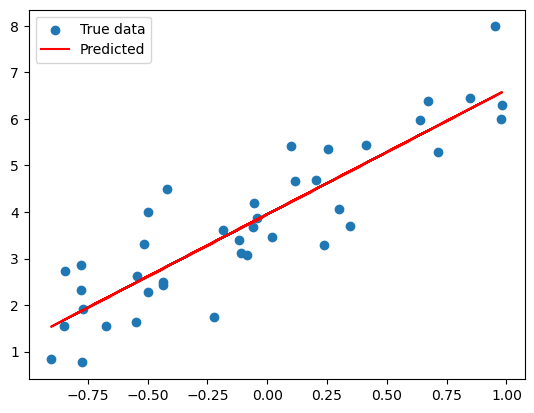

In [12]:
y_pred = x @ theta

plt.scatter(x[:,1].numpy(), y.numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

### FBGD Convergence graphs over 15 epochs

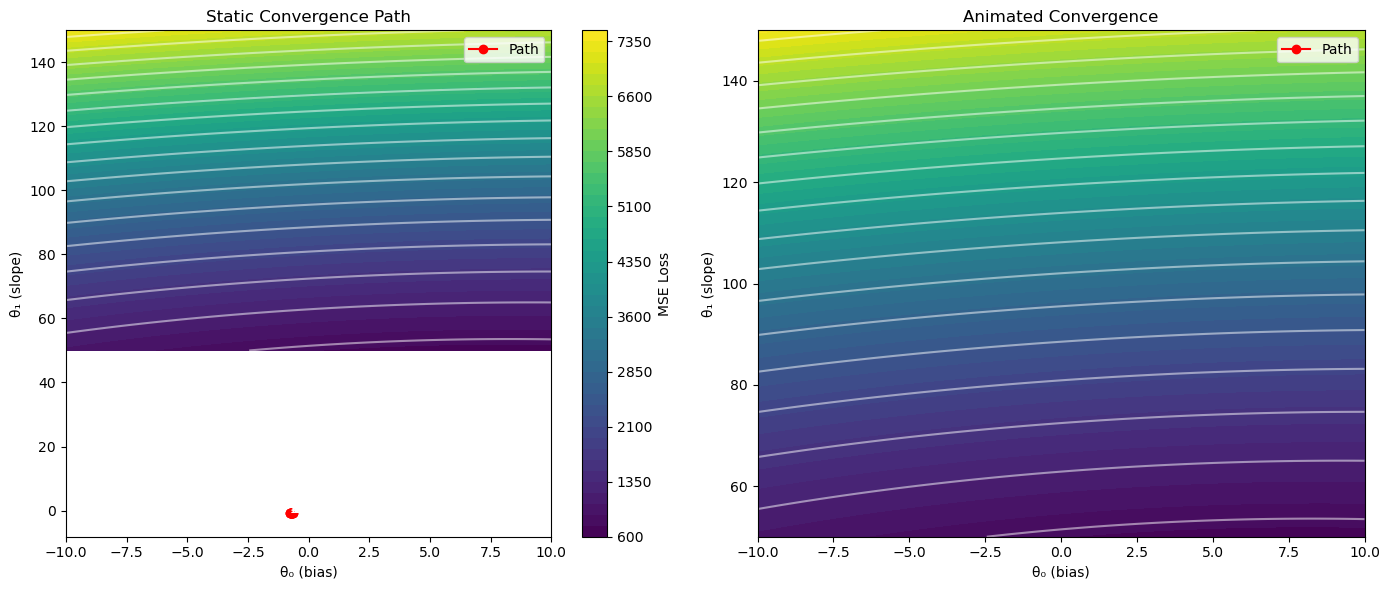

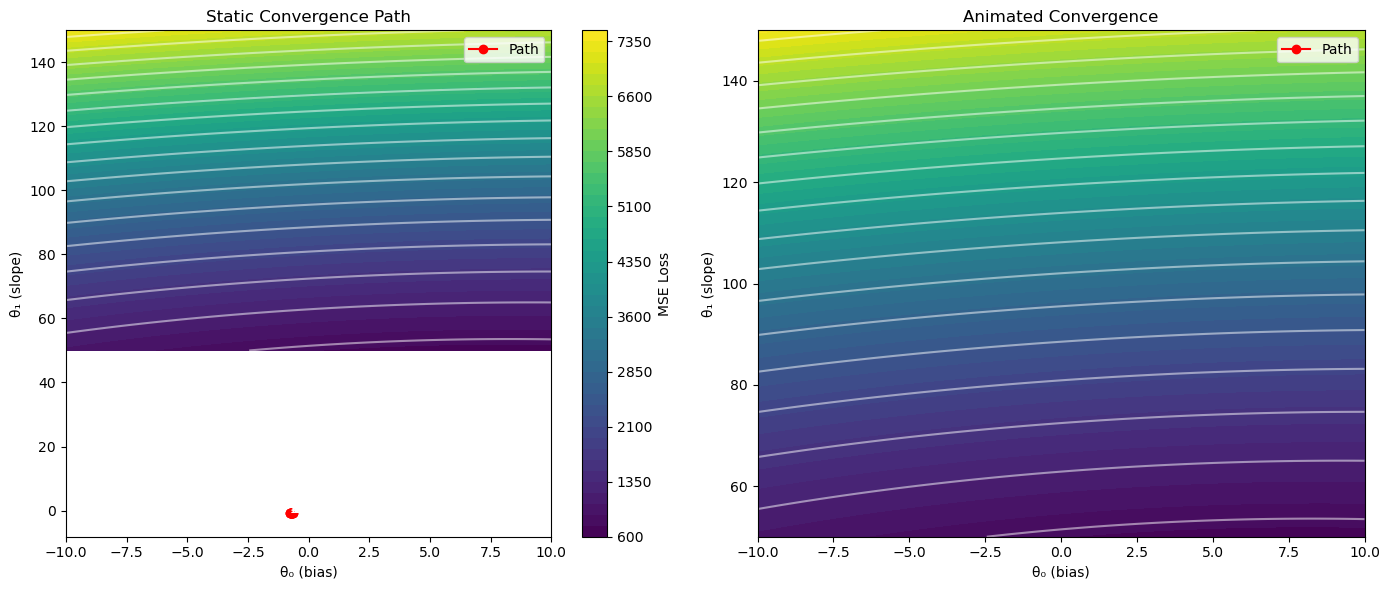

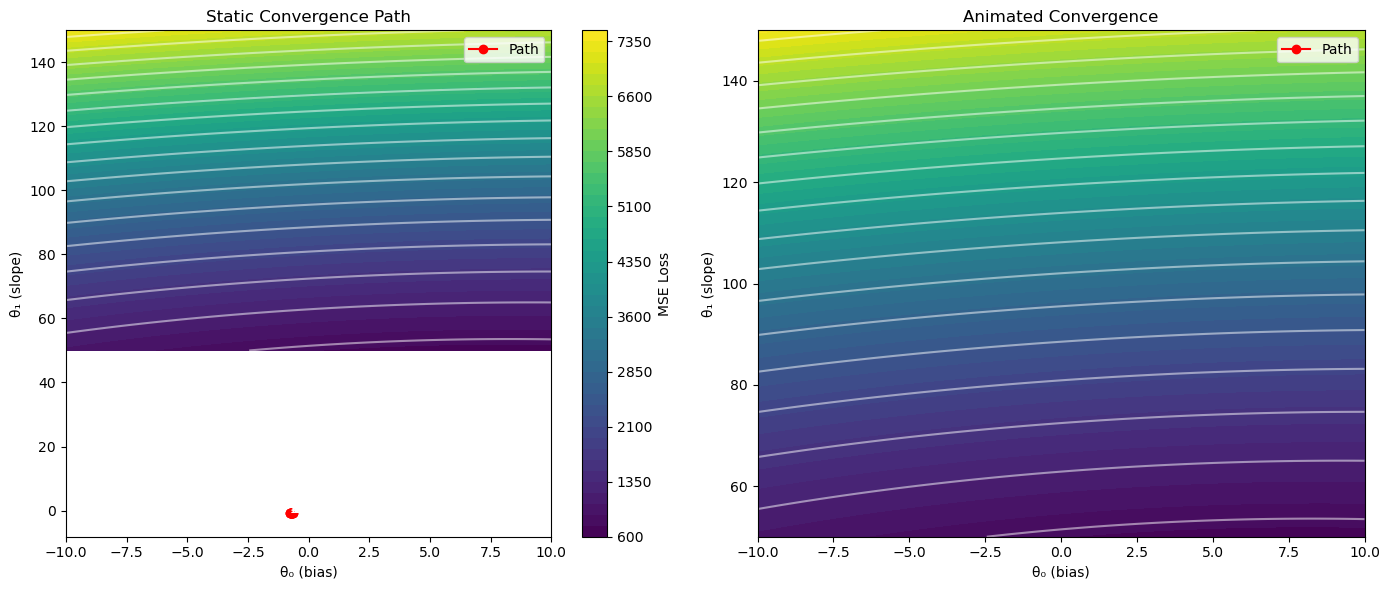

In [13]:
def visualize_convergence(x, y, theta_hist):
    """
    Show static + animated gradient descent convergence side by side.
    """
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(-10, 10, 200)
    t1_vals = np.linspace(50, 150, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    # ✅ Create a single figure with 2 subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Static Plot on Left ---
    c1 = ax1.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax1.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    ax1.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
    for i, (t0, t1) in enumerate(theta_hist):
        ax1.text(t0, t1, str(i+1), color="white", fontsize=8)
    fig.colorbar(c1, ax=ax1, label="MSE Loss")
    ax1.set_xlabel("θ₀ (bias)")
    ax1.set_ylabel("θ₁ (slope)")
    ax1.set_title("Static Convergence Path")
    ax1.legend()

    # --- Animated Plot on Right ---
    c2 = ax2.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax2.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    line, = ax2.plot([], [], 'ro-', label="Path")
    ax2.set_xlabel("θ₀ (bias)")
    ax2.set_ylabel("θ₁ (slope)")
    ax2.set_title("Animated Convergence")
    ax2.legend()

    def update(frame):
        line.set_data(theta_hist[:frame+1, 0], theta_hist[:frame+1, 1])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)

    plt.tight_layout()

    return ani

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist[:20])
ani.save("Example2 - FBGD (with p) Convergence after 20 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist[:100])
ani.save("Example2 - FBGD (with p) Convergence after 100 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist[:5000])
ani.save("Example2 - FBGD (with p) Convergence after 5000 epochs.gif", writer="pillow", fps=2)


### Loss vs epochs graph

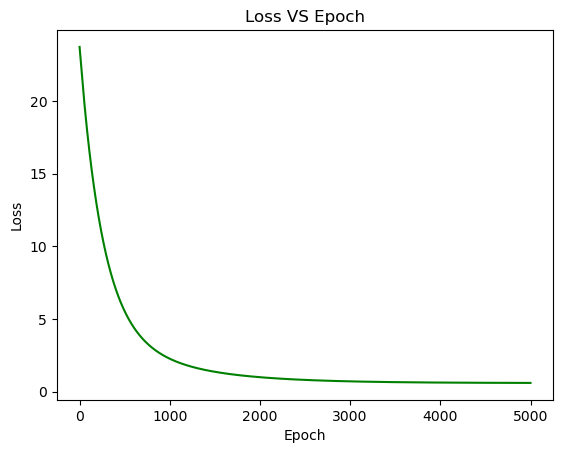

In [14]:
Epoch_hist=np.array([i for i in range(5000)])
plt.plot(Epoch_hist,loss_hist[:5000],color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

# Stochastic gradient Descent

## Example - 1

In [15]:
num_samples = 40
np.random.seed(45) 

# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


### Number of epochs required

In [16]:
theta=torch.randn((2,1),requires_grad=True)#initialize

y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
x_=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
print("size: \n ",y.shape,x.shape)
print("\n")


theta_true=torch.linalg.inv(x_.T@x_)@x_.T@y

print(f"theta_true: \n {theta_true}")
print("\n")

Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
beta = 0.08
v_t = torch.zeros_like(theta)

while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    #indices for shuffuling
    indices = torch.randperm(x.shape[0])

    for i in indices:
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            v_t = beta*v_t + (1-beta)*theta.grad
            theta-=learning_rate*v_t
            theta.grad.zero_()
    if(torch.norm(theta_true.clone().detach()-theta.clone().detach())<0.001):
            break
    if(Epoch>=2000):
        break
    
print("Final Epoch: \n ", Epoch)
print("\n")
print("Final theta: \n ", theta.detach())

size: 
  torch.Size([40, 1]) torch.Size([40, 1])


theta_true: 
 tensor([[ 0.9507],
        [99.9841]])


Final Epoch: 
  2000


Final theta: 
  tensor([[  0.8226],
        [100.5360]])


### Visualizing True data and Predicted data after FBGD

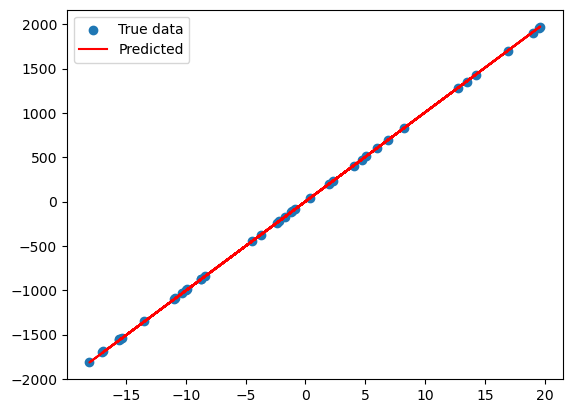

In [17]:
y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

### FBGD Convergence graphs over 15 epochs

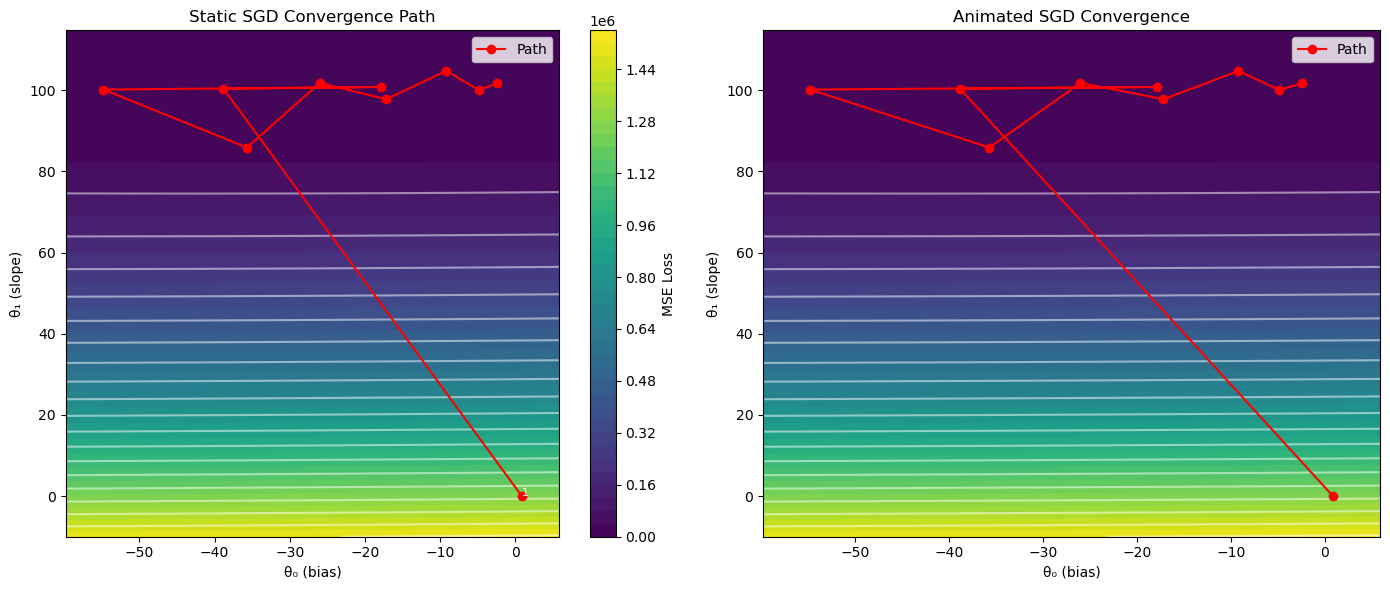

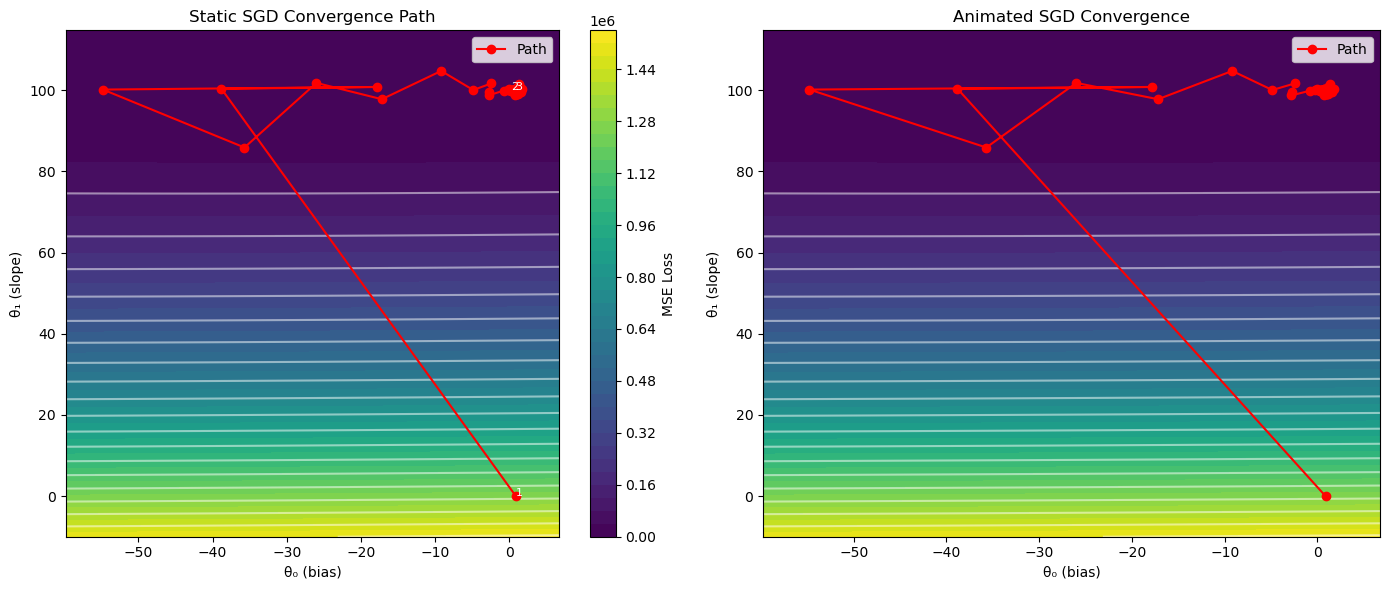

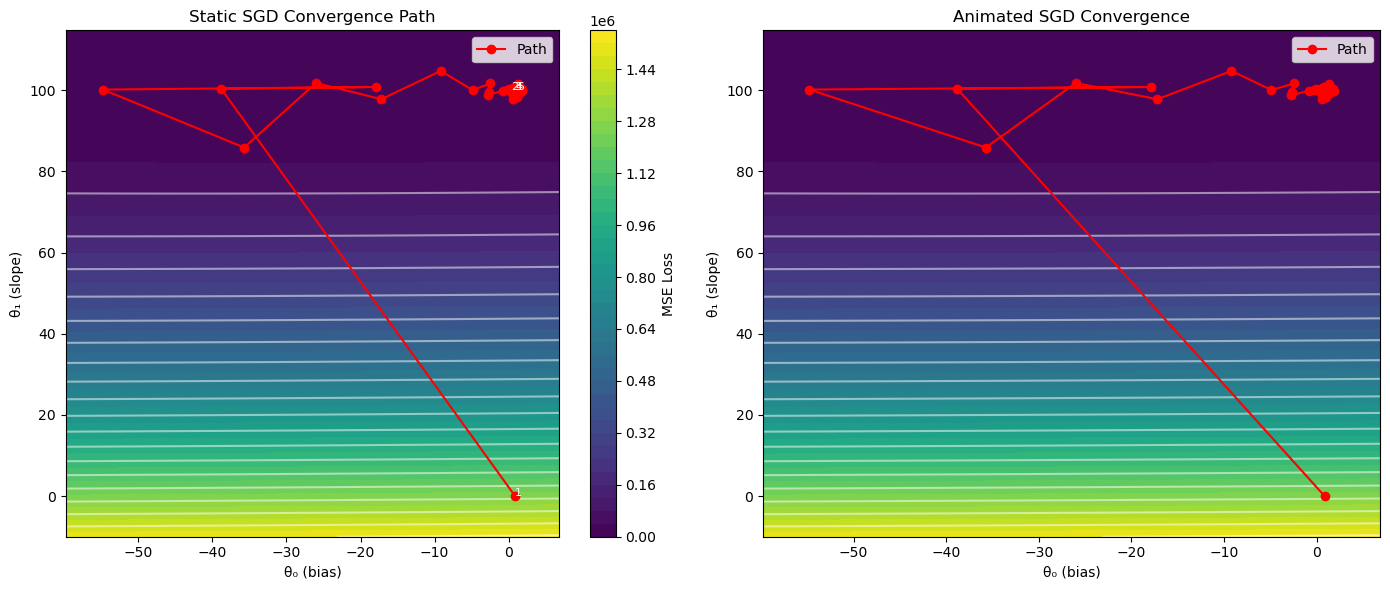

In [18]:
def visualize_convergence_sgd_1d(x, y, theta_hist):
    """
    Visualize SGD convergence (1D) — Static and Animated side by side.
    """
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten if needed
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0]) - 5, np.max(theta_hist[:,0]) + 5, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1]) - 10, np.max(theta_hist[:,1]) + 10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = th[0] + th[1] * x
            Z[i, j] = np.mean((y - y_pred) ** 2)

    # ✅ Create a single figure with 2 subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Static Plot on Left ---
    c1 = ax1.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax1.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    ax1.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
    for k, (t0, t1) in enumerate(theta_hist[::len(x)]):  # label per epoch
        ax1.text(t0, t1, str(k+1), color="white", fontsize=8)
    fig.colorbar(c1, ax=ax1, label="MSE Loss")
    ax1.set_xlabel("θ₀ (bias)")
    ax1.set_ylabel("θ₁ (slope)")
    ax1.set_title("Static SGD Convergence Path")
    ax1.legend()

    # --- Animated Plot on Right ---
    c2 = ax2.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax2.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    line, = ax2.plot([], [], 'ro-', label="Path")
    ax2.set_xlabel("θ₀ (bias)")
    ax2.set_ylabel("θ₁ (slope)")
    ax2.set_title("Animated SGD Convergence")
    ax2.legend()

    def update(frame):
        line.set_data(theta_hist[:frame+1, 0], theta_hist[:frame+1, 1])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=100, blit=True)

    plt.tight_layout()

    return ani


ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist[:10])
ani.save("Example1 - SBGD (with p) Convergence after 10 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist[:100])
ani.save("Example1 - SBGD (with p) Convergence after 100 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist[:200])
ani.save("Example1 - SBGD (with p) Convergence after 200 epochs.gif", writer="pillow", fps=2)



### Loss vs epochs graph

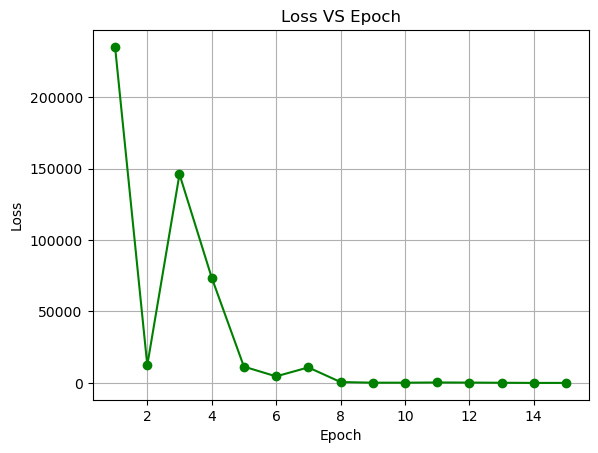

In [19]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)[:600]

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()


## Example - 2

In [28]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

### Number of epochs required

In [29]:
theta=torch.randn((2,1),requires_grad=True)#initialize
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
x_=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
print("size: \n ",y.shape,x.shape)
print("\n")

theta_true=torch.linalg.inv(x_.T@x_)@x_.T@y
print(f"theta_true: \n {theta_true}")
print("\n")

Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
beta = 0.08
v_t = torch.zeros_like(theta)

while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    #indices for shuffuling
    indices = torch.randperm(x.shape[0])

    for i in indices:
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            v_t = beta*v_t + (1-beta)*theta.grad
            theta-=learning_rate*v_t
            theta.grad.zero_()
    if(torch.norm(theta_true.clone().detach()-theta.clone().detach())<0.001):
            break
    if(Epoch>=5000):
        break


print("Final Epoch: \n ", Epoch)
print("\n")
print("Final theta: \n ", theta.detach())

size: 
  torch.Size([40, 1]) torch.Size([40, 1])


theta_true: 
 tensor([[3.9507],
        [2.6825]])


Final Epoch: 
  66


Final theta: 
  tensor([[3.9498],
        [2.6822]])


### Visualizing True data and Predicted data after FBGD

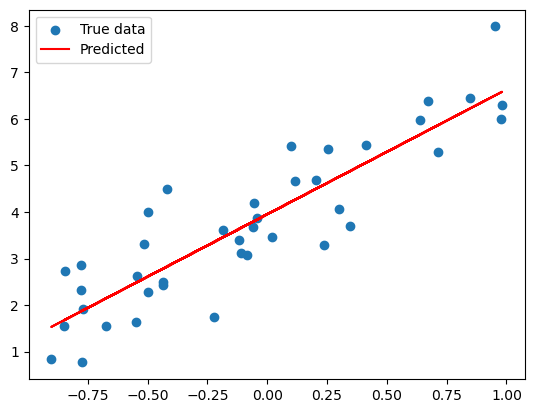

In [23]:
y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

### FBGD Convergence graphs over 15 epochs

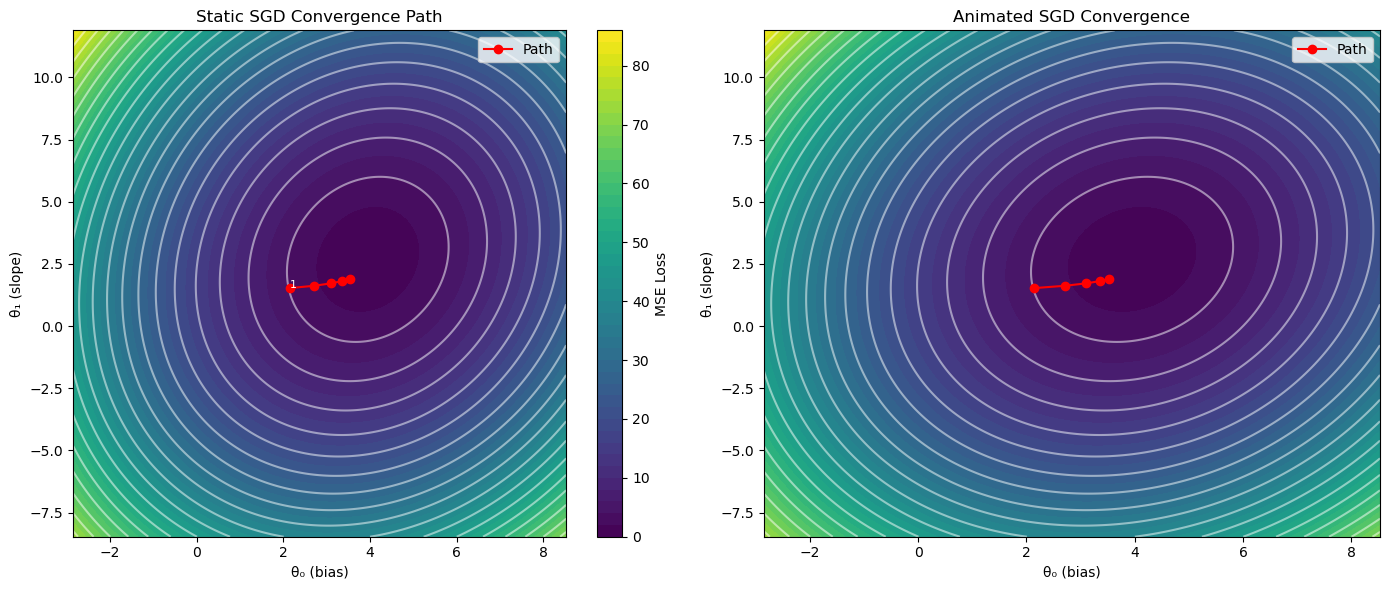

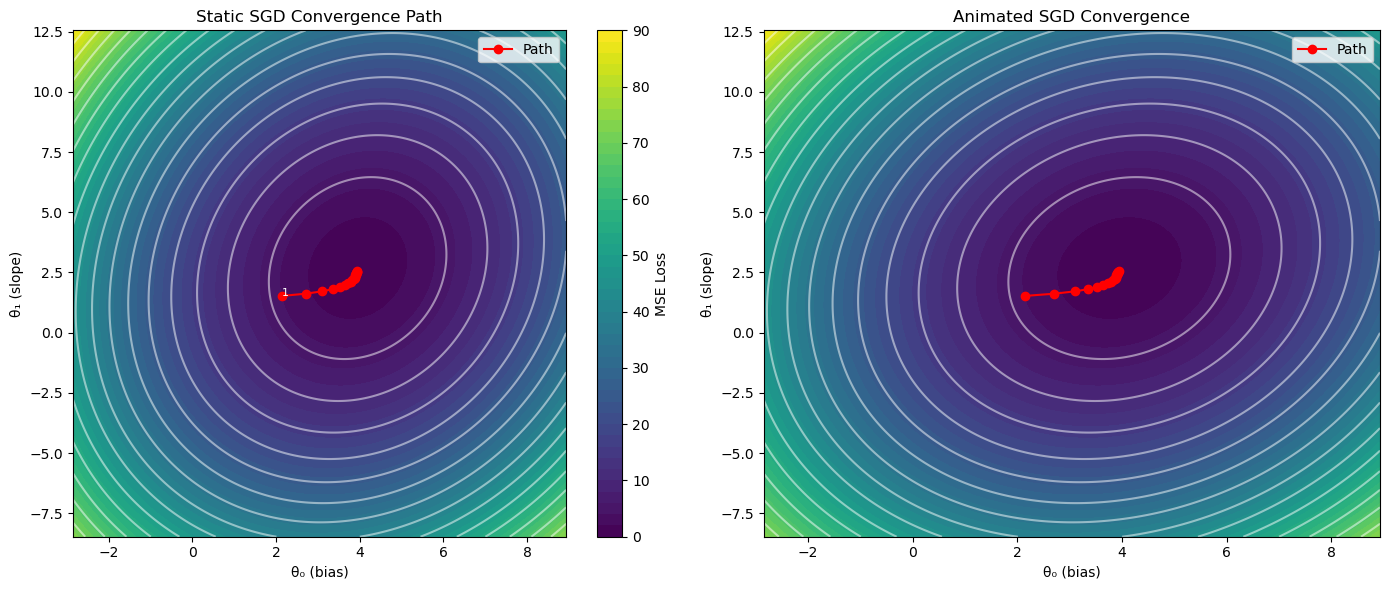

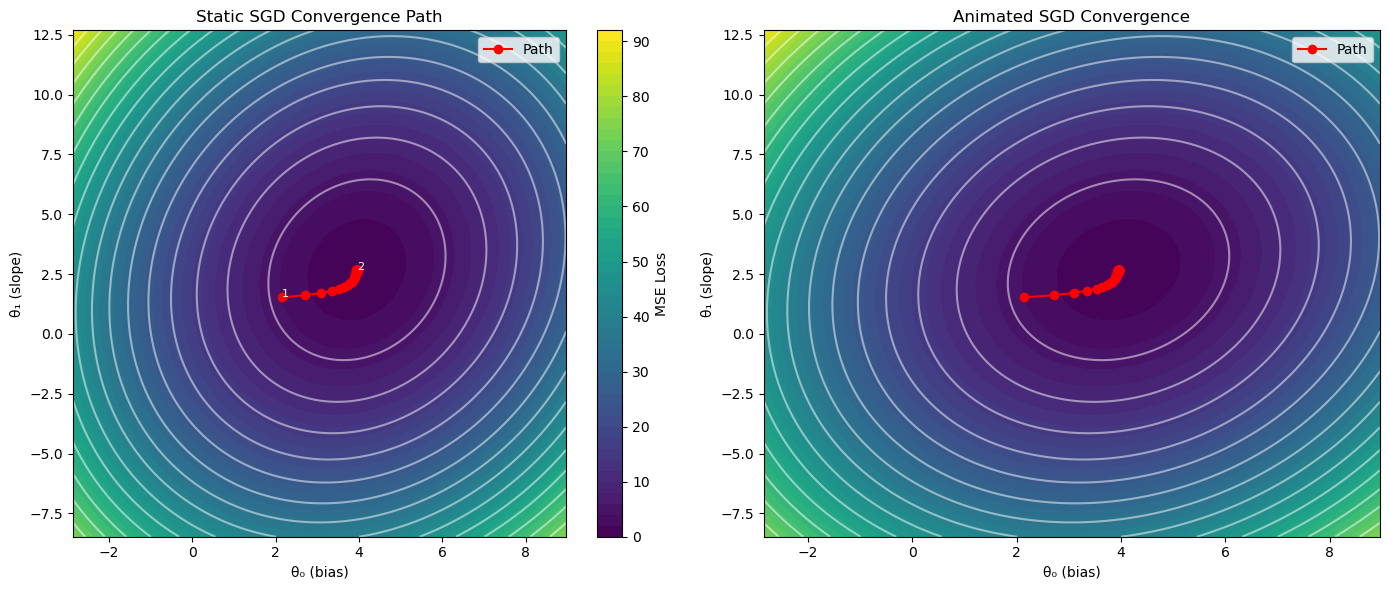

In [26]:
def visualize_convergence_sgd_1d(x, y, theta_hist):
    """
    Visualize SGD convergence (1D) — Static and Animated side by side.
    """
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten if needed
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0]) - 5, np.max(theta_hist[:,0]) + 5, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1]) - 10, np.max(theta_hist[:,1]) + 10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = th[0] + th[1] * x
            Z[i, j] = np.mean((y - y_pred) ** 2)

    # ✅ Create a single figure with 2 subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Static Plot on Left ---
    c1 = ax1.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax1.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    ax1.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
    for k, (t0, t1) in enumerate(theta_hist[::len(x)]):  # label per epoch
        ax1.text(t0, t1, str(k+1), color="white", fontsize=8)
    fig.colorbar(c1, ax=ax1, label="MSE Loss")
    ax1.set_xlabel("θ₀ (bias)")
    ax1.set_ylabel("θ₁ (slope)")
    ax1.set_title("Static SGD Convergence Path")
    ax1.legend()

    # --- Animated Plot on Right ---
    c2 = ax2.contourf(T0, T1, Z, levels=50, cmap="viridis")
    ax2.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
    line, = ax2.plot([], [], 'ro-', label="Path")
    ax2.set_xlabel("θ₀ (bias)")
    ax2.set_ylabel("θ₁ (slope)")
    ax2.set_title("Animated SGD Convergence")
    ax2.legend()

    def update(frame):
        line.set_data(theta_hist[:frame+1, 0], theta_hist[:frame+1, 1])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=100, blit=True)

    plt.tight_layout()

    return ani


ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist[:5])
ani.save("Example2 - SBGD (with p) Convergence after 5 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist[:20])
ani.save("Example2 - SBGD (with p) Convergence after 10 epochs.gif", writer="pillow", fps=2)

ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist[:80])
ani.save("Example2 - SBGD (with p) Convergence after 100 epochs.gif", writer="pillow", fps=2)



### Loss vs epochs graph

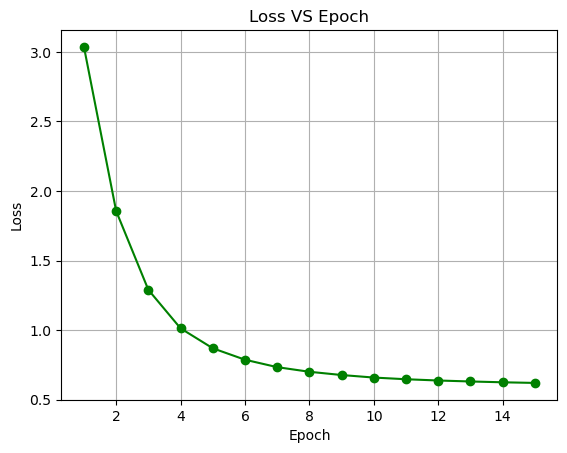

In [27]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)[:600]

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()
